<a href="https://colab.research.google.com/github/adarshmodh/Deep-Learning-Assignments/blob/master/Adarsh_Modh_CIS680_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Drive

This first code block attaches your google drive and makes a folder structure. You only need to run this when a new VM is assigned to you. To get your code as a single python file go through the following menus File->'Download .py'

In [0]:
import os
from google.colab import drive

# Mount google drive
DRIVE_MOUNT='/content/gdrive'
drive.mount(DRIVE_MOUNT)


# create folder to write data to
CIS680_FOLDER=os.path.join(DRIVE_MOUNT, 'My Drive', 'CIS680_2019')
HOMEWORK_FOLDER=os.path.join(CIS680_FOLDER, 'HW1')
os.makedirs(HOMEWORK_FOLDER, exist_ok=True)

In [0]:
#just mount drive
from google.colab import drive
# drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

# PyTorch

This code block imports torch and torchvision which provide the libraries for use down below. PyTorch provides many utilities such as standard datasets, for this exercise we will use MNIST. Please see the torchvision documentation for how to instantiate the training and testing data split.

In [0]:
# torch and torchvision imports
import torch
import torchvision

# Download MNIST
torchvision.datasets.MNIST('.', download=True)

0it [00:00, ?it/s]

9920512it [00:04, 2271234.89it/s]                             


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 57425.51it/s]                           
0it [00:00, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 848659.56it/s]                             
0it [00:00, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 22011.05it/s]            

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train

# 1)  Plot Loss and Gradient

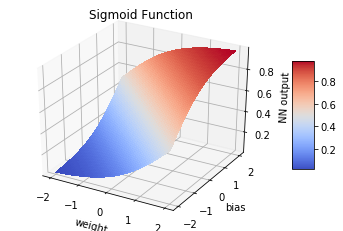

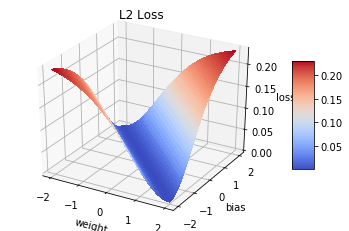

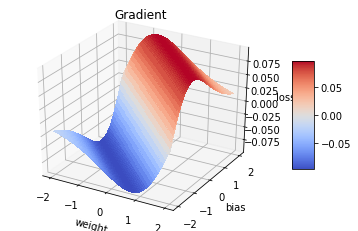

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# from mpl toolkits.mplot3d import plot_surface 
import numpy as np

import torch
from torch.autograd import Variable

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


def myloss(yhat,y,lossfn):
  if lossfn == 'l2':
    loss = (yhat - y)**2
    # loss = np.subtract(yhat,y)**2
  elif lossfn == 'cross_entropy':
    # loss = (-y*torch.log(yhat) + (1-y)*torch.log(1-yhat)) 
    if y == 1:
      loss = -log(yhat)
    else:
      loss = -log(1 - yhat)   
  return loss


w,b = torch.meshgrid([torch.linspace(-2.0,2.0,400, device = device, requires_grad=True),torch.linspace(-2.0,2.0,400, device = device, requires_grad=True)])

x = torch.tensor([[1.0]], device = device)
y_true = torch.tensor([[0.5]], device = device)
# y_true = 0.5*torch.ones([400,400], device= device)

y_pred = torch.nn.Sigmoid()(w*x + b)

l2_loss = myloss(y_pred,y_true,'l2')

w.retain_grad()

l2_loss.sum().backward()

gradient = w.grad
# print(w.grad.shape)

w,b,y_pred,l2_loss,gradient = w.detach().cpu().numpy(), b.detach().cpu().numpy(), y_pred.detach().cpu().numpy(), l2_loss.detach().cpu().numpy(), gradient.detach().cpu().numpy() 

# plot for question 1
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')

surf = ax1.plot_surface(w,b,y_pred, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig1.colorbar(surf, shrink=0.5, aspect=5)
ax1.set_xlabel('weight')
ax1.set_ylabel('bias')
ax1.set_zlabel('NN output')
ax1.set_title('Sigmoid Function')

# plot for question 2
fig2 = plt.figure()
ax2 = fig2.gca(projection='3d')

surf = ax2.plot_surface(w, b, l2_loss, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig2.colorbar(surf, shrink=0.5, aspect=5)
ax2.set_xlabel('weight')
ax2.set_ylabel('bias')
ax2.set_zlabel('loss')
ax2.set_title('L2 Loss')

plt.show()

# plot for question 3
fig3 = plt.figure()
ax3 = fig3.gca(projection='3d')

surf = ax3.plot_surface(w, b, gradient, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig3.colorbar(surf, shrink=0.5, aspect=5)
ax3.set_xlabel('weight')
ax3.set_ylabel('bias')
ax3.set_zlabel('loss')
ax3.set_title('Gradient')

plt.show()




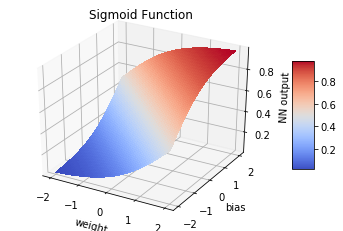

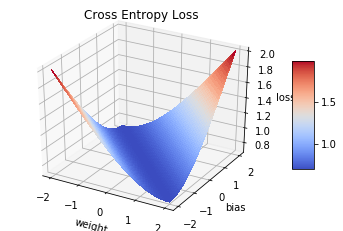

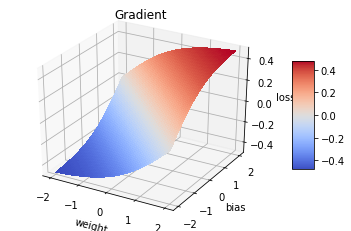

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# from mpl toolkits.mplot3d import plot_surface 
import numpy as np

import torch
from torch.autograd import Variable

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


def myloss(yhat,y,lossfn):
  if lossfn == 'l2':
    loss = (yhat - y)**2
    # loss = np.subtract(yhat,y)**2
  elif lossfn == 'cross_entropy':
    loss = -(y*torch.log(yhat) + (1-y)*torch.log(1-yhat))
  return loss


w,b = torch.meshgrid([torch.linspace(-2.0,2.0,400, device = device, requires_grad=True),torch.linspace(-2.0,2.0,400, device = device, requires_grad=True)])

x = torch.tensor([[1.0]], device = device)
# y_true = torch.tensor([[0.5]], device = device)
y_true = 0.5*torch.ones([400,400], device= device)

y_pred = torch.nn.Sigmoid()(w*x + b)

l2_loss = myloss(y_pred,y_true,'cross_entropy')

w.retain_grad()

l2_loss.sum().backward()

gradient = w.grad
# print(w.grad)

w,b,y_pred,l2_loss,gradient = w.detach().cpu().numpy(), b.detach().cpu().numpy(), y_pred.detach().cpu().numpy(), l2_loss.detach().cpu().numpy(), gradient.detach().cpu().numpy() 

# plot for question 1
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')

surf = ax1.plot_surface(w,b,y_pred, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig1.colorbar(surf, shrink=0.5, aspect=5)
ax1.set_xlabel('weight')
ax1.set_ylabel('bias')
ax1.set_zlabel('NN output')
ax1.set_title('Sigmoid Function')

# plot for question 2
fig2 = plt.figure()
ax2 = fig2.gca(projection='3d')

surf = ax2.plot_surface(w, b, l2_loss, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig2.colorbar(surf, shrink=0.5, aspect=5)
ax2.set_xlabel('weight')
ax2.set_ylabel('bias')
ax2.set_zlabel('loss')
ax2.set_title('Cross Entropy Loss')

plt.show()

# plot for question 3
fig3 = plt.figure()
ax3 = fig3.gca(projection='3d')

surf = ax3.plot_surface(w, b, gradient, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig3.colorbar(surf, shrink=0.5, aspect=5)
ax3.set_xlabel('weight')
ax3.set_ylabel('bias')
ax3.set_zlabel('loss')
ax3.set_title('Gradient')

plt.show()

# 2) Solving XOR with a 2-layer Perceptron

In [0]:
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, SubsetRandomSampler
from torch.autograd import Variable
from torch import FloatTensor
import matplotlib.pyplot as plt


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'

# Make your dataset here
input_data = torch.tensor([[0,0],[0,1], [1,0], [1,1]], dtype=torch.float32, device=device )
labels = torch.tensor([[0,1,1,0]], dtype=torch.float32, device=device).view(-1,1)

# input_data = torch.Tensor([[0,0],[0,1], [1,0], [1,1]])
# labels = torch.Tensor([0,1,1,0]).view(-1,1)

# print(input_data,labels)

# Make your network here
input_dim = input_data.shape[1]
hidden_dim = 2
output_dim = labels.shape[1]
net = nn.Sequential(nn.Linear(input_dim, hidden_dim, bias=True),
                      nn.Tanh(),
                      nn.Linear(hidden_dim, output_dim, bias=True),
                      nn.Sigmoid()).to(device)

loss_fn = nn.BCELoss()

trainloader = DataLoader(TensorDataset(input_data,labels),batch_size=1,shuffle=True)

print(net)


Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Tanh()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)


Epoch: 0, Loss: 1.0302823781967163, 
Epoch: 100, Loss: 0.29086700081825256, 
Epoch: 200, Loss: 0.1285167634487152, 
Epoch: 300, Loss: 0.05264567583799362, 
Epoch: 400, Loss: 0.011765641160309315, 
Epoch: 500, Loss: 0.018445894122123718, 
Epoch: 600, Loss: 0.011355013586580753, 
Epoch: 700, Loss: 0.008980904705822468, 
Epoch: 800, Loss: 0.0025625848211348057, 
Epoch: 900, Loss: 0.0019205164862796664, 
Epoch: 1000, Loss: 0.0014681860338896513, 
Epoch: 1100, Loss: 0.0011400519870221615, 
Epoch: 1200, Loss: 0.0009000774589367211, 
Epoch: 1300, Loss: 0.0016337261768057942, 
Epoch: 1400, Loss: 0.0013017778983339667, 
Epoch: 1500, Loss: 0.0010396280558779836, 
Epoch: 1600, Loss: 0.0009827673202380538, 
Epoch: 1700, Loss: 0.0007928175618872046, 
Epoch: 1800, Loss: 0.00023850661818869412, 
Epoch: 1900, Loss: 0.0005234061391092837, 
Epoch: 2000, Loss: 0.0003594806184992194, 
Epoch: 2100, Loss: 0.0003468995855655521, 
Epoch: 2200, Loss: 0.00010347901843488216, 
Epoch: 2300, Loss: 0.00023069659073

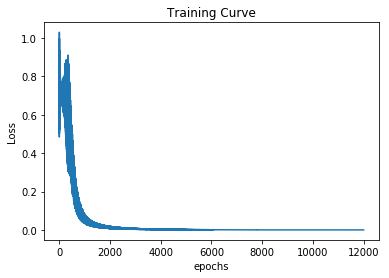

In [0]:
optimizer = optim.Adam(net.parameters(), lr = 0.03)

# Train and plot here
hold_loss=[]

for i in range(4001):
  for x_batch,y_batch in trainloader:
    optimizer.zero_grad()   
    # print(x_batch,y_batch)
    y_pred = net(x_batch)
    # print(y_pred)
    loss = loss_fn(y_pred, y_batch)
    loss.backward()
    optimizer.step()    
    hold_loss.append(loss.item())

  if i % 100 == 0:
      print("Epoch: {0}, Loss: {1}, ".format(i, loss.item()))

plt.ylabel('Loss')
plt.xlabel('epochs')
plt.title('Training Curve')

plt.plot(np.array(hold_loss))
plt.show() 
        

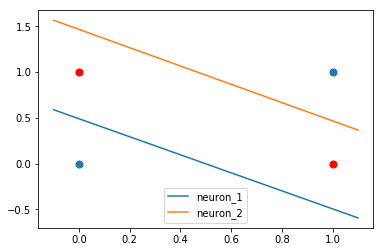

In [0]:
# Plotting decision boundaries
X = torch.Tensor([[0,0],[0,1], [1,0], [1,1]])

model_params = list(net.parameters())
model_weights = model_params[0].data.cpu().numpy()
model_bias = model_params[1].data.cpu().numpy()

plt.scatter(X.numpy()[[0,-1], 0], X.numpy()[[0, -1], 1], s=50)
plt.scatter(X.numpy()[[1,2], 0], X.numpy()[[1, 2], 1], c='red', s=50)

x_1 = np.arange(-0.1, 1.1, 0.1)
y_1 = ((x_1 * model_weights[0,0]) + model_bias[0]) / (-model_weights[0,1])
plt.plot(x_1, y_1)

x_2 = np.arange(-0.1, 1.1, 0.1)
y_2 = ((x_2 * model_weights[1,0]) + model_bias[1]) / (-model_weights[1,1])
plt.plot(x_2, y_2)
plt.legend(["neuron_1", "neuron_2"], loc=8)
plt.show()


# 3) Train a Convolutional Neural Network

In [0]:
# Creating dataset

from pathlib import Path
import random


data_folder = Path("/content/gdrive/My Drive/CIS680_2019/HW1")

import torch
from torchvision import datasets, transforms

transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize(mean=[0.0],std=[1.0])])

trainset = datasets.MNIST(data_folder / "MNIST_data/", download=True, train=True, transform=transform)
valset = datasets.MNIST(data_folder / "MNIST_data/", download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


In [88]:
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, SubsetRandomSampler
from torch.autograd import Variable
from torch import FloatTensor
from torchvision import transforms, datasets
import matplotlib.pyplot as plt


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create your network here
class HelloWorld(nn.Module):
  def __init__(self):
    super(HelloWorld , self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2, dilation=1, groups=1, bias=True, padding_mode='zeros')
    self.conv1_bn = nn.BatchNorm2d(32)
    self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, stride=1, padding=2, dilation=1, groups=1, bias=True, padding_mode='zeros')
    self.conv2_bn = nn.BatchNorm2d(32)
    self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)
    self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2, dilation=1, groups=1, bias=True, padding_mode='zeros')
    self.conv3_bn = nn.BatchNorm2d(64)
    self.pool3 = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)
    self.fc1 = nn.Linear(in_features=64*3*3, out_features=64, bias=False)
    self.fc1_bn = nn.BatchNorm1d(64)
    self.fc2 = nn.Linear(in_features=64, out_features=10, bias=False)
    self.softmax = nn.LogSoftmax(dim=1)

  def forward(self, x):
    x = self.pool1(F.relu(self.conv1_bn(self.conv1(x))))
    x = self.pool2(F.relu(self.conv2_bn(self.conv2(x))))
    x = self.pool3(F.relu(self.conv3_bn(self.conv3(x))))
    x = x.flatten(1)
    x = F.relu(self.fc1_bn(self.fc1(x)))
    x = self.softmax(self.fc2(x))
    return x

# Instantiate your network here
model = HelloWorld().to(device)
print(model)

HelloWorld(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=576, out_features=64, bias=False)
  (fc1_bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=64, out_features=10, bias=False)
  (softmax): LogSoftmax()
)


In [89]:
# Train your network here

loss_criterion = nn.NLLLoss()

optimizer = optim.Adam(model.parameters(), lr = 0.02)

training_loss=[]
training_acc=[]

validation_loss = []
validation_acc = []


epochs = 15
for e in range(epochs):
    running_loss = 0.0
    running_acc = 0

    #Training 
    for images, labels in trainloader:
        images,labels = images.to(device), labels.to(device)
        # print(images.shape,labels.shape)
        optimizer.zero_grad()        
        output = model(images)
        loss = loss_criterion(output, labels)
        loss.backward()
        optimizer.step()
  
        running_loss += loss.item()
        
        pred_labels = torch.argmax(torch.exp(output), dim=1)
        # print(pred_labels,labels)
        running_acc += torch.sum(pred_labels == labels).float()/labels.shape[0]
        # print(running_acc, len(trainloader))
    else:
        training_acc.append(running_acc/len(trainloader))
        training_loss.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
        
        #Testing
        test_running_loss = 0.0
        test_running_acc = 0
        for images,labels in valloader:
          images,labels = images.to(device), labels.to(device)
          with torch.no_grad():
            output = model(images)
            loss = loss_criterion(output,labels)
            test_running_loss += loss.item()
            pred_labels = torch.argmax(torch.exp(output),dim=1)
            test_running_acc += torch.sum(pred_labels == labels).float()/labels.shape[0]

        validation_loss.append(test_running_loss/len(valloader))
        validation_acc.append(test_running_acc/len(valloader))

# torch.save(model.state_dict(), data_folder / 'mnist.pt')

#for Q4.3 saving a new trained model
torch.save(model.state_dict(), data_folder / 'mnist_1.pt')

Epoch 0 - Training loss: 0.13299591574214223
Epoch 1 - Training loss: 0.05949638584561185
Epoch 2 - Training loss: 0.051177192766314696
Epoch 3 - Training loss: 0.04678004438768445
Epoch 4 - Training loss: 0.04071386352078175
Epoch 5 - Training loss: 0.0375796274851952
Epoch 6 - Training loss: 0.034809226736124514
Epoch 7 - Training loss: 0.03169711997935068
Epoch 8 - Training loss: 0.031158619990218867
Epoch 9 - Training loss: 0.028157711720098056
Epoch 10 - Training loss: 0.026540157900475807
Epoch 11 - Training loss: 0.02761209412847262
Epoch 12 - Training loss: 0.02176115516203839
Epoch 13 - Training loss: 0.0221857493236931
Epoch 14 - Training loss: 0.020268775346968918


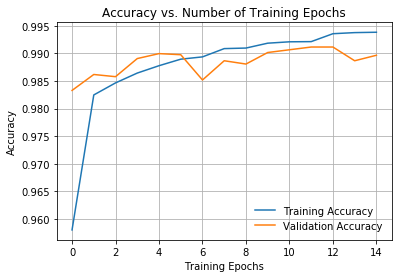

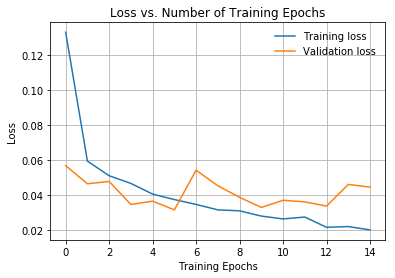

In [180]:
# Plot training and validation curves
plt.figure(0)
plt.title("Accuracy vs. Number of Training Epochs")
plt.xlabel("Training Epochs")
plt.ylabel("Accuracy")
plt.plot(training_acc, label='Training Accuracy')
plt.plot(validation_acc, label='Validation Accuracy')
plt.legend(frameon=False)
plt.grid()
plt.show()

plt.figure(1)
plt.title("Loss vs. Number of Training Epochs")
plt.xlabel("Training Epochs")
plt.ylabel("Loss")
plt.plot(training_loss, label='Training loss')
plt.plot(validation_loss, label='Validation loss')
plt.legend(frameon=False)
plt.grid()
plt.show()


# 4) Adversarial Images

Q2 targeted fgsm initial Label = tensor([4])
New target label = tensor([8])
tensor([0.9859], device='cuda:0') tensor([8], device='cuda:0')
tfgsm_pass
Q2 targeted fgsm initial Label = tensor([2])
New target label = tensor([6])
tensor([0.9981], device='cuda:0') tensor([1], device='cuda:0')
tensor([0.5165], device='cuda:0') tensor([1], device='cuda:0')
tensor([0.9257], device='cuda:0') tensor([2], device='cuda:0')
tensor([0.4006], device='cuda:0') tensor([6], device='cuda:0')
tensor([0.4900], device='cuda:0') tensor([6], device='cuda:0')
tensor([0.6907], device='cuda:0') tensor([6], device='cuda:0')
tensor([0.8004], device='cuda:0') tensor([6], device='cuda:0')
tensor([0.8776], device='cuda:0') tensor([6], device='cuda:0')
tensor([0.8917], device='cuda:0') tensor([6], device='cuda:0')
tensor([0.9332], device='cuda:0') tensor([6], device='cuda:0')
tfgsm_pass


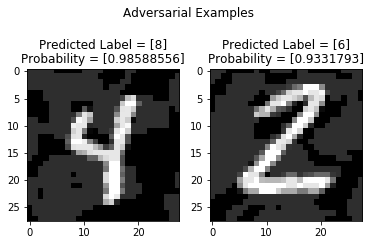

In [178]:
#first build model (run cell 35)

# taking any 2 random exaples from test dataset for generating adversarial examples
train_indices = [random.randint(0,len(valset)) for x in range(0,2)]
adv_testloader = torch.utils.data.DataLoader(valset , batch_size=1, sampler=SubsetRandomSampler(train_indices))

model.load_state_dict(torch.load(data_folder / 'mnist.pt'))
model.eval()

loss_criterion = nn.NLLLoss()

# FGSM attack code
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon*sign_data_grad
    # Adding clipping to maintain [0,1] range
    perturbed_image = torch.clamp(perturbed_image, -1, 1)
    # Return the perturbed image
    return perturbed_image

def t_fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image - epsilon*sign_data_grad
    # Adding clipping to maintain [0,1] range
    perturbed_image = torch.clamp(perturbed_image, -1, 1)
    # Return the perturbed image
    return perturbed_image


def test(model, device, testloader, epsilon, attack):
    
    # Accuracy counter
    adv_final_pred_labels = []
    adv_examples = []

    # Loop over all examples in test set
    for images,target_labels in testloader:

      probability = 0.0
      flag = 0

      if attack == "t_fgsm":
        print("Q2 targeted fgsm initial Label = {}".format(target_labels))
        temp = torch.randint(0,9,(1,))        
        while(temp == target_labels):
          temp = torch.randint(0,9,(1,))
        target_labels = temp          
        print("New target label = {}".format(target_labels))   

      # Send the data and label to the device
      images, target_labels = images.to(device), target_labels.to(device)
      # Set requires_grad attribute of tensor. Important for Attack
      images.requires_grad = True

      while(probability < 0.9 or flag<500):       
        # Forward pass the data through the model
        if flag == 0:
          # print("flag")
          output = model(images)
        else: 
          output = model(perturbed_image)

        flag+=1

        init_pred = torch.argmax(torch.exp(output),dim=1)

        # Calculate the loss
        
        loss = loss_criterion(output,target_labels)

        # Zero all existing gradients
        model.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()
        
        # Collect datagrad
        data_grad = images.grad.data

        # Call FGSM Attack
        if attack == "fgsm":
          perturbed_image = fgsm_attack(images, epsilon, data_grad)
        elif attack == "t_fgsm":
          perturbed_image = t_fgsm_attack(images, epsilon, data_grad)


        # Re-classify the perturbed image
        output = model(perturbed_image)

        # Check for success
        probability,final_pred = torch.max(torch.exp(output),dim=1)
        print(probability.data, final_pred)

        if attack == "fgsm":
          if final_pred != target_labels and probability.data>0.9:
            adv_examples.append(perturbed_image.view(28,28).detach().cpu().numpy())
            adv_final_pred_labels.append([final_pred.cpu().numpy(),probability.detach().cpu().numpy()])
            flag = 500
            print("fgsm_pass")
        elif attack == "t_fgsm":
          if final_pred == target_labels and probability.data>0.9:
            adv_examples.append(perturbed_image.view(28,28).detach().cpu().numpy())
            adv_final_pred_labels.append([final_pred.cpu().numpy(),probability.detach().cpu().numpy()])
            flag = 500
            print("tfgsm_pass")

    return adv_examples, adv_final_pred_labels

epsilons = 0.1

# for Q1
# examples, pred_labels = test(model, device, adv_testloader, epsilons, "fgsm")

# for Q2
examples, pred_labels = test(model, device, adv_testloader, epsilons, "t_fgsm")

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Adversarial Examples')
ax1.set_title('Predicted Label = {}' .format(pred_labels[0][0]) + '\n' + 'Probability = {}' .format(pred_labels[0][1]))
ax2.set_title('Predicted Label = {}' .format(pred_labels[1][0]) + '\n' + 'Probability = {}' .format(pred_labels[1][1]))
ax1.imshow(examples[0], cmap="gray")
ax2.imshow(examples[1], cmap="gray")

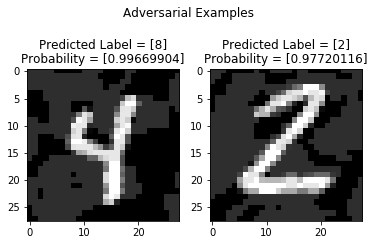

In [179]:
#Q4.3 retrain the network again and save it in mnist_1.pt and test for the adversarial images

model.load_state_dict(torch.load(data_folder / 'mnist_1.pt'))
model.eval()

pred_labels = []

for i, image in enumerate(examples):
  image = torch.as_tensor(image, dtype = torch.float32, device=device).unsqueeze(0).unsqueeze(0)
  with torch.no_grad():
    output = model(image)
    probability,final_pred = torch.max(torch.exp(output),dim=1)
    pred_labels.append([final_pred.cpu().numpy(), probability.detach().cpu().numpy()])

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Adversarial Examples')
ax1.set_title('Predicted Label = {}' .format(pred_labels[0][0]) + '\n' + 'Probability = {}' .format(pred_labels[0][1]))
ax2.set_title('Predicted Label = {}' .format(pred_labels[1][0]) + '\n' + 'Probability = {}' .format(pred_labels[1][1]))
ax1.imshow(examples[0], cmap="gray")
ax2.imshow(examples[1], cmap="gray")
